Qunatum Phase Estimation

In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.circuit.library import PhaseGate
from qiskit.circuit.library import  QFT
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram

Measurement counts: {'1001': 1000}


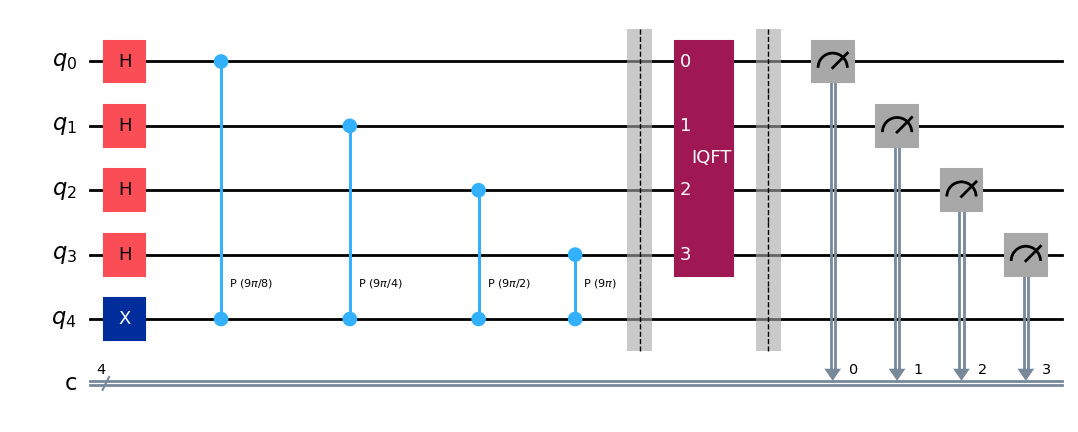

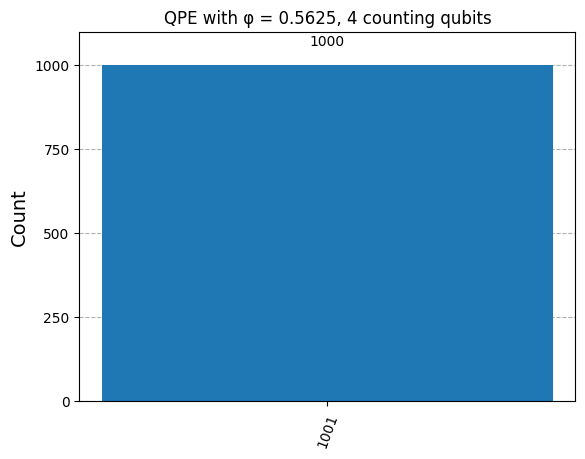

In [2]:
%matplotlib inline
def QPE(t, n_target, phi):
    # t: number of counting qubits (first register) ; n_target: number of target qubits (second register, usually 1)
    qc = QuantumCircuit(t + n_target,t)
    # Prepared target qubit in |1⟩
    qc.x(t)  # This sets the first target qubit to |1⟩
    # Applied Hadamard to counting qubits
    for j in range(t):
        qc.h(j)
    # Applied controlled-phase gates
    for j in range(t):
        angle = 2 * np.pi * phi * (2 ** j)
        qc.cp(angle, j, t)  # control: j, target: t (first target qubit)
    qc.barrier()
    qc.append(QFT(t).inverse(), range(t))
    qc.barrier()
    qc.measure(range(t), range(t))  # Added measurement
    return qc
t = 4
n_target = 1
phi = 0.5625
qc = QPE(t, n_target, phi)
qc.draw(output="mpl", style="iqp")
shots = 1000

sim = AerSimulator()
tqc = transpile(qc, sim)
result = sim.run(tqc, shots=shots).result()
counts = result.get_counts()

print("Measurement counts:", counts)
hist = plot_histogram(counts, title=f"QPE with φ = {phi}, {t} counting qubits")
plt.show()


Measurement counts: {'0010001110': 1, '0010000101': 950, '0010001000': 2, '0010000011': 3, '0010001100': 1, '0010000100': 8, '0010000110': 23, '0010001001': 2, '0010000001': 3, '0010001101': 1, '0010001011': 1, '0010000111': 2, '0010001010': 1, '0001111101': 2}


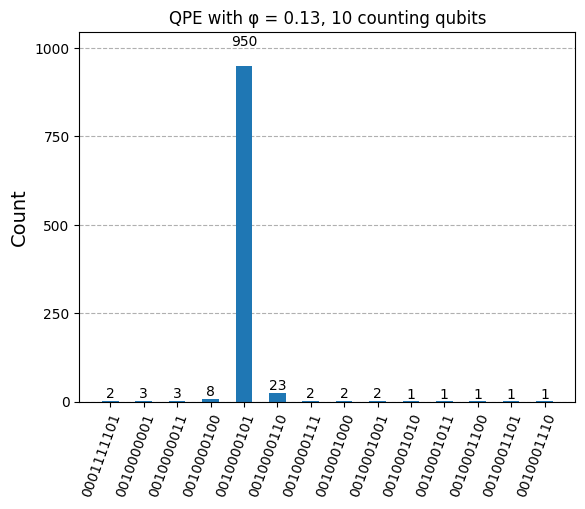

In [3]:
t = 10
n_target = 1
phi = 0.13
qc = QPE(t, n_target, phi)
shots = 1000

sim = AerSimulator()
tqc = transpile(qc, sim)
result = sim.run(tqc, shots=shots).result()
counts = result.get_counts()

# Print and plot results
print("Measurement counts:", counts)
hist=plot_histogram(counts, title=f"QPE with φ = {phi}, {t} counting qubits")
plt.show()